Example notebook showing how to use the nested sampler. Uses rejection flow, useful for low dimensions

In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import NestedSampler
from nnest.likelihoods import *

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Likelihood + prior
#like = Himmelblau(2)
#transform = lambda x: 5*x
like = Rosenbrock(3)
transform = lambda x: 5*x
#like = Gaussian(2, 0.9)
#transform = lambda x: 3*x
#like = Eggbox(2)
#transform = lambda x: 5*np.pi*x
#like = GaussianShell(2)
#transform = lambda x: 5*x
#like = GaussianMix(2)
#transform = lambda x: 5*x

In [6]:
sampler = NestedSampler(like.x_dim, like, transform=transform, num_live_points=1000, hidden_dim=16, num_blocks=3, flow='spline')

Creating directory for new run logs/test/run24
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=2, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_fe

In [7]:
sampler.run(strategy=['rejection_prior', 'rejection_flow', 'mcmc'])

[nnest.sampler] [INFO] MCMC steps [15]
[nnest.sampler] [INFO] Initial scale [1.1547]
[nnest.sampler] [INFO] Volume switch [-1.0000]
[nnest.sampler] [INFO] Step [0] loglstar [-1.4376e+05] max logl [-1.4131e+01] logz [-1.4377e+05] vol [1.00000e+00] ncalls [1001] mean calls [0.0000]
[nnest.sampler] [INFO] Step [200] loglstar [-4.8017e+04] max logl [-1.4131e+01] logz [-4.8024e+04] vol [8.18731e-01] ncalls [1222] mean calls [1.0000]
[nnest.sampler] [INFO] Step [400] loglstar [-3.3526e+04] max logl [-1.4131e+01] logz [-3.3534e+04] vol [6.70320e-01] ncalls [1483] mean calls [1.3000]
[nnest.sampler] [INFO] Step [600] loglstar [-2.2773e+04] max logl [-7.6959e+00] logz [-2.2780e+04] vol [5.48812e-01] ncalls [1824] mean calls [1.7000]
[nnest.sampler] [INFO] Step [800] loglstar [-1.5676e+04] max logl [-7.6959e+00] logz [-1.5683e+04] vol [4.49329e-01] ncalls [2194] mean calls [2.2000]
[nnest.sampler] [INFO] Step [1000] loglstar [-1.0631e+04] max logl [-5.8332e+00] logz [-1.0639e+04] vol [3.67879e-0

[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0012]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.0379] validation loss [-0.0381]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.0460] validation loss [-0.0432]
[nnest.trainer] [INFO] Epoch [105] ran out of patience
[nnest.trainer] [INFO] Best epoch [55] validation loss [-0.0437]
[nnest.sampler] [INFO] Step [7000] loglstar [-1.2712e+01] max logl [-1.4884e-02] logz [-2.2059e+01] vol [9.11882e-04] ncalls [22136] mean calls [3.2000]
[nnest.sampler] [INFO] Step [7200] loglstar [-1.0865e+01] max logl [-1.4884e-02] logz [-2.0243e+01] vol [7.46586e-04] ncalls [22692] mean calls [1.7000]
[nnest.sampler] [INFO] Step [7400] loglstar [-9.3896e+00] max logl [-1.4884e-02] logz [-1.8692e+01] vol [6.11253e-04] ncalls [23341] mean calls [4.6000]
[nnest.sampler] [INFO] Step [7600] loglstar [-8.2027e+00] max logl [-1.4884e-02] logz [-1.7497e+01] vol [5.00451e-04] ncalls [24071] mean calls [4.1000]
[

In [8]:
print(sampler.logz)

-10.593426613750792


In [9]:
mc = MCSamples(samples=sampler.samples, weights=sampler.weights, loglikes=-sampler.loglikes)

Removed no burn in


In [10]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())
print(mc.likeStats)

5102.540085941207
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      7.7971147E-01  4.6579369E-01  5.4474823E-01  1.3015794E+00  two   -2.2757445E-01  1.5256347E+00  two   -8.2668590E-01  1.5931834E+00  two     p_{1}
param2      8.2666071E-01  5.6199497E-01  7.5620738E-02  1.2250946E+00  two   -8.2654200E-02  1.9037548E+00  two   -1.7330253E-01  2.1600423E+00  two     p_{2}
param3      9.9735597E-01  1.1095251E+00 -1.2589247E-01  1.2340356E+00  two   -1.9688806E-01  3.7617961E+00  two   -2.2165002E-01  4.5533974E+00  two     p_{3}

Best fit sample -log(Like) = 0.002810
mean(-Ln(like)) = 1.627939
-Ln(mean like)  = 1.132067

parameter   bestfit        lower1         upper1         lower2         upper2
param1      9.9109925E-01  6.8483846E-02  1.5029207E+00 -9.5634535E-01  1.5193138E+00   p_{1}
param2      9.7793229E-01 -1.2400703E-02  

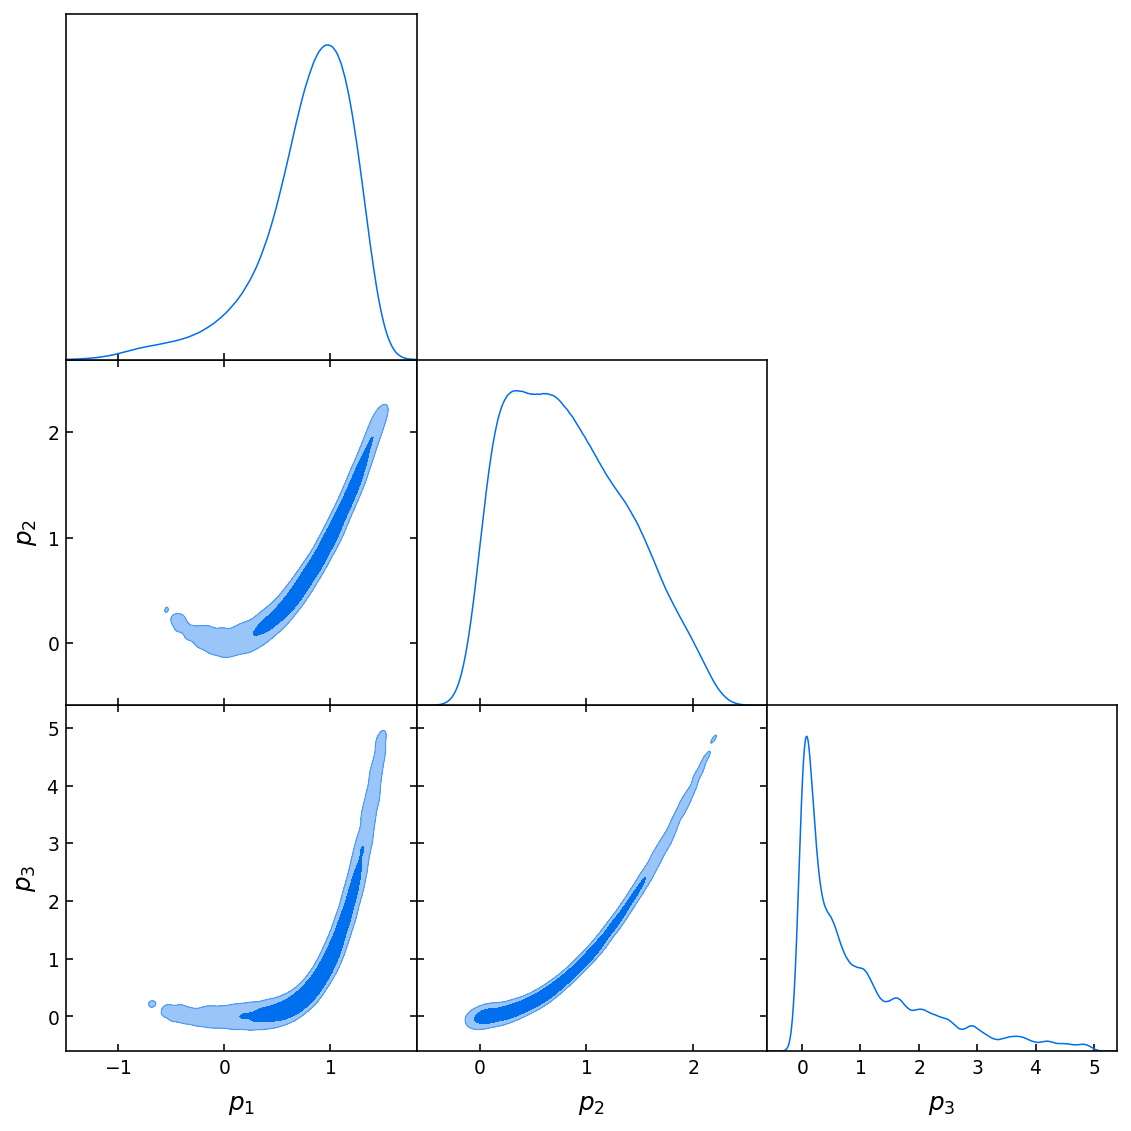

In [11]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)